In [3]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [6]:
os.listdir(current_path)

['no', 'yes']

In [5]:
current_path = os.path.join(os.getcwd(), "brain_tumor_dataset")


In [7]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

In [8]:
train_data = datagen.flow_from_directory(
    current_path,
    classes=['no', 'yes'],
    target_size=(128,128),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    current_path,
    classes=['no', 'yes'],
    target_size=(128,128),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)


Found 203 images belonging to 2 classes.


Found 50 images belonging to 2 classes.


In [9]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
print(train_data.samples)  # kitni images training me hain
print(val_data.samples)    # kitni images validation me hain
print(train_data.class_indices)


203
50
{'no': 0, 'yes': 1}


In [11]:

history = model.fit(train_data, validation_data=val_data, epochs=20)



c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 667ms/step - accuracy: 0.6293 - loss: 0.6817 - val_accuracy: 0.7400 - val_loss: 0.5305
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.7460 - loss: 0.5165 - val_accuracy: 0.7400 - val_loss: 0.6104
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.8288 - loss: 0.4564 - val_accuracy: 0.7600 - val_loss: 0.5311
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.8165 - loss: 0.4639 - val_accuracy: 0.7600 - val_loss: 0.6161
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.8193 - loss: 0.4825 - val_accuracy: 0.7400 - val_loss: 0.5802
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.8681 - loss: 0.3230 - val_accuracy: 0.7800 - val_loss: 0.5966
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.8631 - loss: 0.3390 - val_accuracy: 0.7600 - val_loss: 0.4596
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.8763 - loss: 0.3270 - val_accuracy: 0.8000 - val_loss:

In [12]:

model.save("Tumor.h5")
# print("Model saved as potato_disease_model.h5")


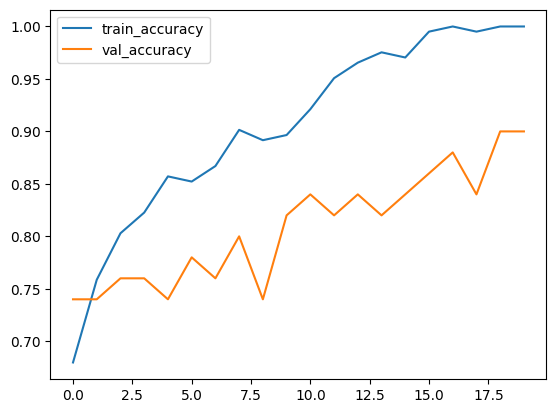

In [13]:

plt.plot(history.history['accuracy'], label="train_accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()


In [14]:
print(train_data.class_indices)


{'no': 0, 'yes': 1}
